## Importando as bibliotecas

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

## Importando o dataset MNIST

O dataset MNIST é uma grande base de dados de dígitos manuscritos utilizada para treinamento de diversos sistemas de processamento de imagens, possuindo também aplicações em treinamentos e testes de Machine Learning.
- 70 mil imagens
- 60 mil para treinamento
- 10 mil para teste
- Imagens com tamanho exato de 28x28 pixels

In [2]:
mnist = tf.keras.datasets.mnist
(img_train, num_train) , (img_test, num_test) = mnist.load_data()

## Verificação dos dados

#### Imagens de treinamento

In [3]:
img_train.shape

(60000, 28, 28)

#### Imagens de teste

In [4]:
img_test.shape

(10000, 28, 28)

#### Grupos diferentes no conjunto de labels

In [5]:
np.unique(num_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

A quantidade de 10 grupos diferentes no conjunto de labels é exatamente o esperado, já que é a mesma quantidade de dígitos que podem ser manuscritos no contexto desse dataset.

## Manipulação básica dos dados

#### Visualizando uma imagem aleatória do banco de dados

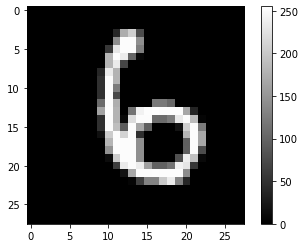

In [6]:
choice = 186
plt.figure()
plt.imshow(img_train[choice], cmap='gray')
plt.colorbar()
plt.show()

#### Visualizando 35 imagens do banco de dados (7x5)

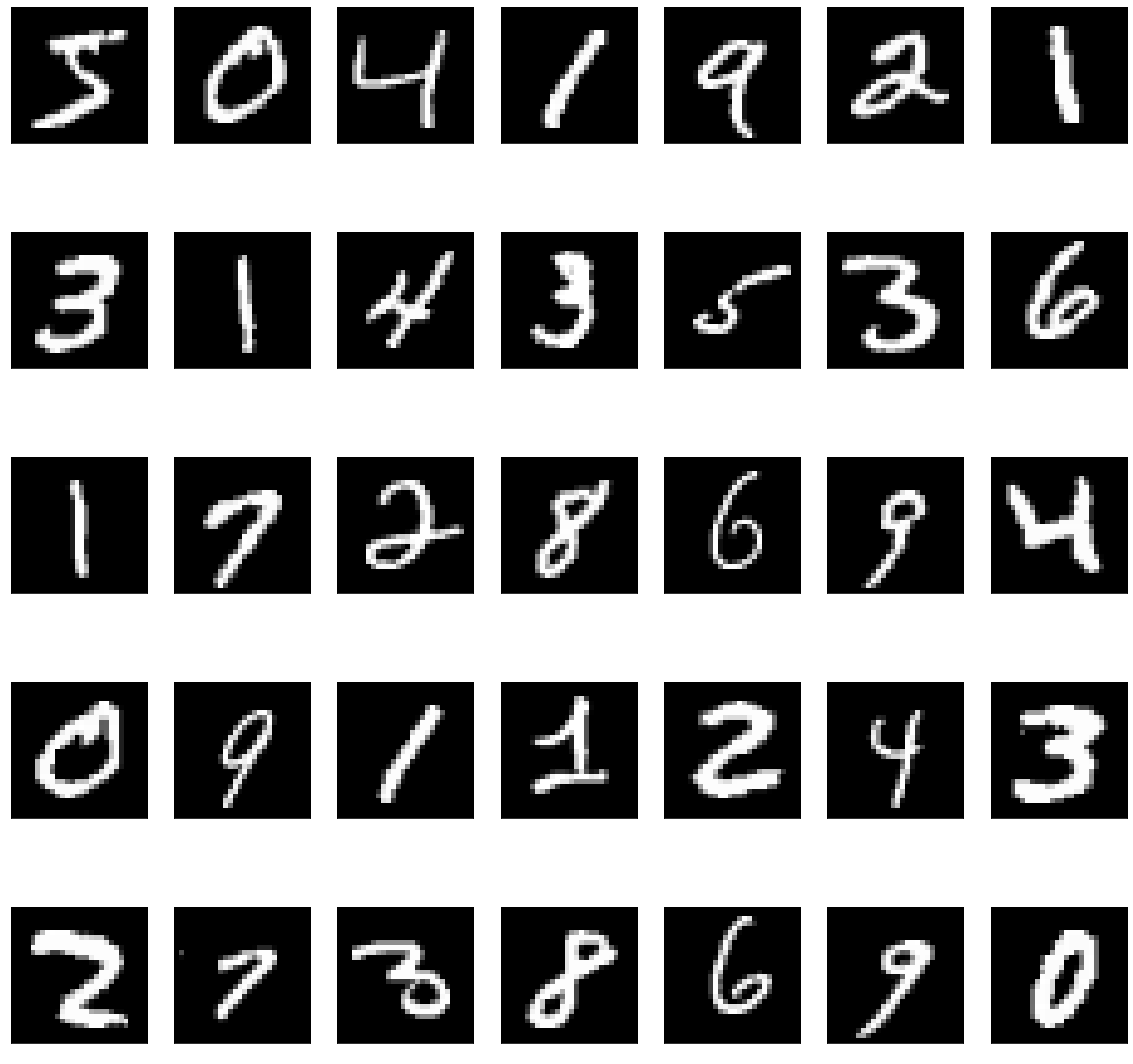

In [7]:
plt.figure(figsize = (20 , 20))
for img in range(35):
    plt.subplot(5, 7, img+1)
    plt.imshow(img_train[img], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(num_train[img], color="white")
plt.show()

## Modelo 1 (relu)

#### Criação e treinamento

In [8]:
modelo1 = Sequential()
modelo1.add(Flatten())
modelo1.add(Dense(300, activation = 'relu', kernel_initializer = 'he_uniform'))
modelo1.add(Dense(10, activation = 'softmax'))
modelo1.compile(optimizer = 'RMSprop', metrics = ['accuracy'], loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True))
modelo1.fit(x = img_train, y = num_train, epochs = 30)

Epoch 1/30


c:\Users\016193631\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 10s 5ms/step - loss: 4.0388 - accuracy: 0.9047
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8140 - accuracy: 0.9471
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5817 - accuracy: 0.9586
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5404 - accuracy: 0.9656
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4933 - accuracy: 0.9715
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3994 - accuracy: 0.9750
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3753 - accuracy: 0.9783
Epoch 8/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3639 - accuracy: 0.9791
Epoch 9/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3482 - accuracy: 0.9818
Epoch 10/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3299 - accura

#### Performance

In [9]:
test_loss, test_acc = modelo1.evaluate(img_test, num_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5288 - accuracy: 0.9767


#### Teste manual aleatório

In [10]:
prob1 = tf.keras.Sequential([modelo1, tf.keras.layers.Softmax()])
pred1 = prob1.predict(img_test)
np.argmax(pred1[153])

313/313 [==============================] - 1s 3ms/step


5

O modelo apontou que a imagem 153 é um número 5

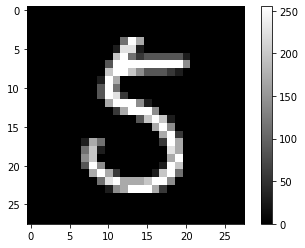

In [11]:
plt.figure()
plt.imshow(img_test[153], cmap='gray')
plt.colorbar()
plt.show()

In [12]:
num_test[153]

5

Como já esperado após a visualização, a imagem 153 é realmente um número 5 e o modelo acertou.

## Modelo 2 (sigmoid)

#### Criação e treinamento

In [13]:
modelo2 = Sequential()
modelo2.add(Flatten())
modelo2.add(Dense(300, activation = 'sigmoid', kernel_initializer = 'he_uniform'))
modelo2.add(Dense(10, activation = 'softmax'))
modelo2.compile(optimizer = 'RMSprop', metrics = ['accuracy'], loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True))
modelo2.fit(x = img_train, y = num_train, epochs = 30)

Epoch 1/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3731 - accuracy: 0.8910
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2389 - accuracy: 0.9284
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2092 - accuracy: 0.9377
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1974 - accuracy: 0.9415
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1862 - accuracy: 0.9449
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1754 - accuracy: 0.9487
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1706 - accuracy: 0.9501
Epoch 8/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1660 - accuracy: 0.9514
Epoch 9/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1631 - accuracy: 0.9532
Epoch 10/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.16

#### Performance

In [14]:
test_loss, test_acc = modelo2.evaluate(img_test, num_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1541 - accuracy: 0.9582


## Modelo 3 (softplus)

#### Criação e treinamento

In [15]:
modelo3 = Sequential()
modelo3.add(Flatten())
modelo3.add(Dense(300, activation = 'softplus', kernel_initializer = 'he_uniform'))
modelo3.add(Dense(10, activation = 'softmax'))
modelo3.compile(optimizer = 'RMSprop', metrics = ['accuracy'], loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True))
modelo3.fit(x = img_train, y = num_train, epochs = 30)

Epoch 1/30
1875/1875 [==============================] - 11s 6ms/step - loss: 4.0699 - accuracy: 0.9014
Epoch 2/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7911 - accuracy: 0.9468
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6723 - accuracy: 0.9588
Epoch 4/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6005 - accuracy: 0.9654
Epoch 5/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5605 - accuracy: 0.9706
Epoch 6/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5378 - accuracy: 0.9736
Epoch 7/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4730 - accuracy: 0.9772
Epoch 8/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4198 - accuracy: 0.9787
Epoch 9/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4057 - accuracy: 0.9810
Epoch 10/30
1875/1875 [==============================] - 9s 5ms/step - loss

#### Performance

In [16]:
test_loss, test_acc = modelo3.evaluate(img_test, num_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.7267 - accuracy: 0.9750


## Modelo 4 (softsign)

#### Criação e treinamento

In [17]:
modelo4 = Sequential()
modelo4.add(Flatten())
modelo4.add(Dense(300, activation = 'softsign', kernel_initializer = 'he_uniform'))
modelo4.add(Dense(10, activation = 'softmax'))
modelo4.compile(optimizer = 'RMSprop', metrics = ['accuracy'], loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True))
modelo4.fit(x = img_train, y = num_train, epochs = 30)

Epoch 1/30
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2878 - accuracy: 0.9140
Epoch 2/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1609 - accuracy: 0.9515
Epoch 3/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1299 - accuracy: 0.9614
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1118 - accuracy: 0.9657
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0985 - accuracy: 0.9703
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0868 - accuracy: 0.9734
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0779 - accuracy: 0.9755
Epoch 8/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0726 - accuracy: 0.9774
Epoch 9/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0681 - accuracy: 0.9791
Epoch 10/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

#### Performance

In [18]:
test_loss, test_acc = modelo4.evaluate(img_test, num_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.1062 - accuracy: 0.9748


## Modelo 5 (selu)

#### Criação e treinamento

In [19]:
modelo5 = Sequential()
modelo5.add(Flatten())
modelo5.add(Dense(300, activation = 'selu', kernel_initializer = 'he_uniform'))
modelo5.add(Dense(10, activation = 'softmax'))
modelo5.compile(optimizer = 'RMSprop', metrics = ['accuracy'], loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True))
modelo5.fit(x = img_train, y = num_train, epochs = 30)

Epoch 1/30
1875/1875 [==============================] - 12s 6ms/step - loss: 3.9180 - accuracy: 0.9031
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.9174 - accuracy: 0.9470
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6820 - accuracy: 0.9591
Epoch 4/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5598 - accuracy: 0.9667
Epoch 5/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5037 - accuracy: 0.9705
Epoch 6/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4803 - accuracy: 0.9742
Epoch 7/30
1875/1875 [==============================] - 1090s 582ms/step - loss: 0.4503 - accuracy: 0.9765
Epoch 8/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4254 - accuracy: 0.9792
Epoch 9/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4048 - accuracy: 0.9802
Epoch 10/30
1875/1875 [==============================] - 10s 6ms/step 

#### Performance

In [20]:
test_loss, test_acc = modelo5.evaluate(img_test, num_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.2442 - accuracy: 0.9734


## Ranking de desempenho dos modelos

1.      Modelo 1 (relu) - 97,67%
2.      Modelo 3 (softplus) - 97,50%
3.      Modelo 4 (softsign) - 97,48%
4.      Modelo 5 (selu) - 97,34%
5.      Modelo 2 (sigmoid) - 95,82%